# ARIMA model over shampoo sales data and check the MSE between predicted and actual value.




https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line



In [62]:
import pandas as pd
import numpy as np
from pandas import read_csv 
from pandas import datetime
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA 
from sklearn.metrics import mean_squared_error 
import statsmodels.api as sm


C:\Users\pRoJyot\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [31]:
df = r"D:\Machine Learning Sentex\dataset_kaggel\sales_shampoo.csv"

In [32]:
def parser(x):
    return datetime.strptime(x, '%d-%m-%Y')

In [33]:
series = read_csv(df, header=0, parse_dates=[0],index_col=0, squeeze=True, date_parser=parser)

In [34]:
series

Month
2001-01-01    266.0
2001-02-01    145.9
2001-03-01    183.1
2001-04-01    119.3
2001-05-01    180.3
2001-06-01    168.5
2001-07-01    231.8
2001-08-01    224.5
2001-09-01    192.8
2001-10-01    122.9
2001-11-01    336.5
2001-12-01    185.9
2002-01-01    194.3
2002-02-01    149.5
2002-03-01    210.1
2002-04-01    273.3
2002-05-01    191.4
2002-06-01    287.0
2002-07-01    226.0
2002-08-01    303.6
2002-09-01    289.9
2002-10-01    421.6
2002-11-01    264.5
2002-12-01    342.3
2003-01-01    339.7
2003-02-01    440.4
2003-03-01    315.9
2003-04-01    439.3
2003-05-01    401.3
2003-06-01    437.4
2003-07-01    575.5
2003-08-01    407.6
2003-09-01    682.0
2003-10-01    475.3
2003-11-01    581.3
2003-12-01    646.9
Name: Sales of shampoo over a three year period, dtype: float64

In [35]:
series.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales of shampoo over a three year period, dtype: float64

<AxesSubplot:xlabel='Month'>

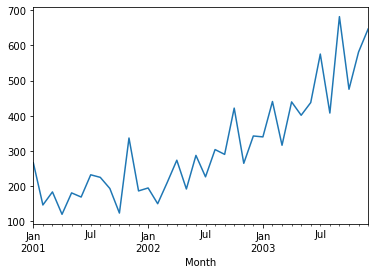

In [36]:
series.plot()

In [37]:
move_series = series.rolling(window=3).mean()

<AxesSubplot:xlabel='Month'>

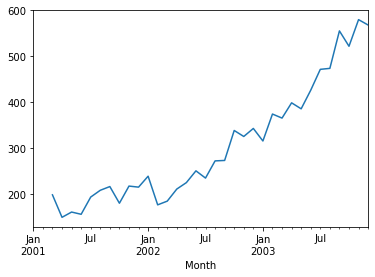

In [38]:
move_series.plot()

In [39]:
sm.stats.durbin_watson(series)

0.09548538187456361

In [49]:
ser_squeeze = series
ser_squeeze.astype(int)


Month
2001-01-01    266
2001-02-01    145
2001-03-01    183
2001-04-01    119
2001-05-01    180
2001-06-01    168
2001-07-01    231
2001-08-01    224
2001-09-01    192
2001-10-01    122
2001-11-01    336
2001-12-01    185
2002-01-01    194
2002-02-01    149
2002-03-01    210
2002-04-01    273
2002-05-01    191
2002-06-01    287
2002-07-01    226
2002-08-01    303
2002-09-01    289
2002-10-01    421
2002-11-01    264
2002-12-01    342
2003-01-01    339
2003-02-01    440
2003-03-01    315
2003-04-01    439
2003-05-01    401
2003-06-01    437
2003-07-01    575
2003-08-01    407
2003-09-01    682
2003-10-01    475
2003-11-01    581
2003-12-01    646
Name: Sales of shampoo over a three year period, dtype: int32

(array([-30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18,
        -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,
         -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,
          9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,
         22,  23,  24,  25,  26,  27,  28,  29,  30]),
 array([0.14157062, 0.16065768, 0.18806294, 0.20444862, 0.2101872 ,
        0.25516282, 0.26584305, 0.27768493, 0.29010705, 0.30567864,
        0.33492409, 0.34363439, 0.36441203, 0.38863454, 0.3981667 ,
        0.44133651, 0.46708165, 0.48844442, 0.50207607, 0.54336722,
        0.57938874, 0.59652848, 0.62732785, 0.66325246, 0.69388857,
        0.75036972, 0.7760929 , 0.82921516, 0.87487315, 0.89529334,
        1.        , 0.89529334, 0.87487315, 0.82921516, 0.7760929 ,
        0.75036972, 0.69388857, 0.66325246, 0.62732785, 0.59652848,
        0.57938874, 0.54336722, 0.50207607, 0.48844442, 0.46708165,
        0.44133651, 0.3981667 , 0.3886345

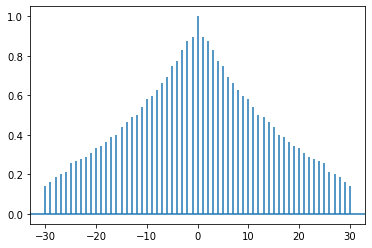

In [59]:
plt.acorr(ser_squeeze, maxlags = 30)  

C:\Users\pRoJyot\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


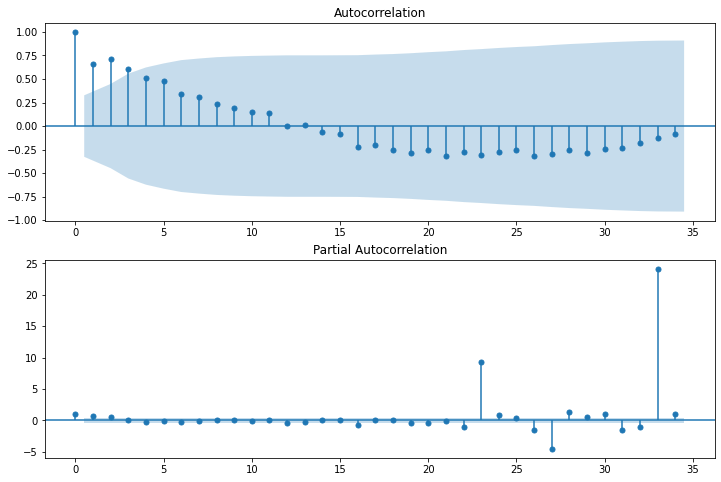

In [61]:
# show plots in the notebook
%matplotlib inline

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series.values.squeeze(), lags=34, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series, lags=34, ax=ax2)

In [63]:
training_data=series[0:26]
test_data=series[26:]

In [64]:
from statsmodels.tsa.arima_model import ARIMA

In [125]:
arima= ARIMA(training_data,order=(2,2,2)) # order (p,d,q)

C:\Users\pRoJyot\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pRoJyot\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [126]:
model=arima.fit()

C:\Users\pRoJyot\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [127]:
model.aic

280.16672896227493

In [128]:
pred= model.forecast(steps=10)[0]

In [129]:
pred

array([382.8858201 , 430.35965225, 436.56261892, 463.3090072 ,
       482.42177338, 506.46044961, 529.79022127, 554.93433099,
       580.76225498, 607.78043549])

In [130]:
from sklearn.metrics import mean_squared_error

In [131]:
np.sqrt(mean_squared_error(test_data,pred))

74.80559908058277

In [132]:
# MSE is higher because of less Data
# UnderFitting
